In [376]:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
import statistics
import seaborn as sns; sns.set(style="whitegrid")
import math
%run Cointegration.py
%matplotlib inline

In [377]:
def regressao_multipla(data, y_symbol, x_symbol, period):
    numbers = np.arange(1, period+1)
    pairs = pd.DataFrame()
    pairs[y_symbol] = data[y_symbol]
    pairs[x_symbol] = data[x_symbol]

    pairs = pairs[len(data)-period:]
    pairs['Temp'] = period - numbers + 1
    
    y = pairs[y_symbol]
    x = pairs[[x_symbol, 'Temp']]
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    return {"CoefTemp":model.params['Temp'], 
            "CoefAng":model.params[x_symbol],
            "CoefLin":model.params['const']}

In [378]:
data = pd.read_csv('datasets/data.csv', index_col=0)
data.drop(['30/06/2020'], inplace=True)

In [379]:
#'CYRE3', 'LREN3
y_symbol = 'CYRE3'
x_symbol = 'LREN3'
period = 250

In [380]:
numbers = np.arange(1, period+1)
tempo = period - numbers + 1
data_limmit = data[len(data)-period:]

data_limmit = data_limmit[[y_symbol, x_symbol]]
data_limmit = data_limmit[::-1]

In [381]:
coef = regressao_multipla(data_limmit, y_symbol, x_symbol, period)
coef

{'CoefTemp': 0.011868219129681725,
 'CoefAng': 0.8424162042232446,
 'CoefLin': -17.867584242046956}

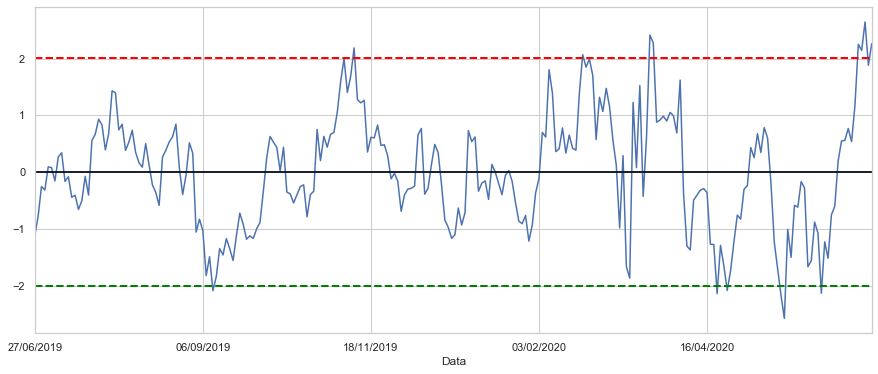

In [382]:
res = data_limmit[y_symbol]-coef['CoefAng']*data_limmit[x_symbol]-tempo*coef['CoefTemp']-coef['CoefLin']
# antes de plotar os dados devem ser invertidos para ordem crescente
res = res[::-1]
ret = zscore(res)
std = statistics.stdev(ret)
ret.plot(figsize=(15,6))
plt.axhline(ret.mean())

plt.axhline(0, color='black',label='mean') # Add the mean of residual
plt.axhline(2*std, color='red', linestyle='--', linewidth=2)
plt.axhline(-2*std, color='green', linestyle='--', linewidth=2)

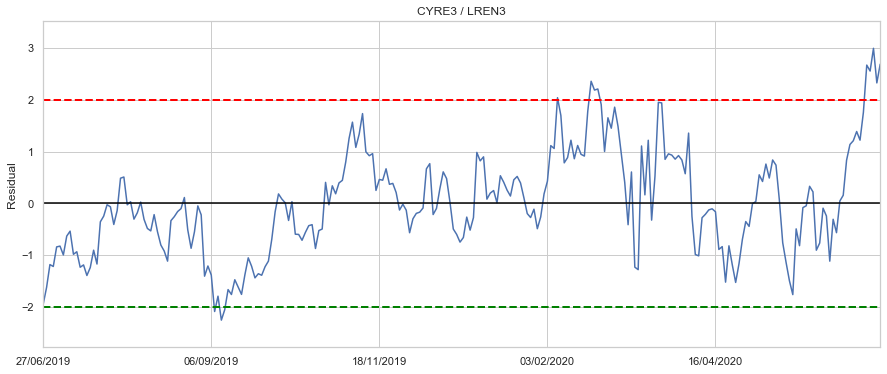

In [383]:
show(data, y_symbol, x_symbol, period)

In [384]:
"""numbers = np.arange(1, len(data_limmit)+1)
data_limmit['Du'] = 140 - numbers + 1

y = data_limmit[y_symbol]
x = data_limmit[[x_symbol, 'Du']]

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print('Coef.Temp: {}'.format(model.params['Du']))
print('Coef.Ang: {}'.format(model.params[x_symbol]))
print('Coef.Linear: {}'.format(model.params['const']))"""

"numbers = np.arange(1, len(data_limmit)+1)\ndata_limmit['Du'] = 140 - numbers + 1\n\ny = data_limmit[y_symbol]\nx = data_limmit[[x_symbol, 'Du']]\n\nx = sm.add_constant(x)\nmodel = sm.OLS(y, x).fit()\nprint('Coef.Temp: {}'.format(model.params['Du']))\nprint('Coef.Ang: {}'.format(model.params[x_symbol]))\nprint('Coef.Linear: {}'.format(model.params['const']))"

In [385]:
"""coef_temp = -0.0003
coef_ang = 0.141
coef_linear = 9.97

#data['resid'] = data['BBAS3']-coef_ang*data['CSAN3']-data['Du']*coef_temp-coef_linear
resid = data_limmit[y_symbol]-coef_ang*data_limmit[x_symbol]-data_limmit['Du']*coef_temp-coef_linear
resid = resid[::-1]"""

"coef_temp = -0.0003\ncoef_ang = 0.141\ncoef_linear = 9.97\n\n#data['resid'] = data['BBAS3']-coef_ang*data['CSAN3']-data['Du']*coef_temp-coef_linear\nresid = data_limmit[y_symbol]-coef_ang*data_limmit[x_symbol]-data_limmit['Du']*coef_temp-coef_linear\nresid = resid[::-1]"

In [386]:
"""result = zscore(resid)
std = statistics.stdev(result)
result.plot(figsize=(15,6))
plt.axhline(result.mean())

plt.axhline(0, color='black',label='mean') # Add the mean of residual
plt.axhline(2*std, color='red', linestyle='--', linewidth=2)
plt.axhline(-2*std, color='green', linestyle='--', linewidth=2)"""

"result = zscore(resid)\nstd = statistics.stdev(result)\nresult.plot(figsize=(15,6))\nplt.axhline(result.mean())\n\nplt.axhline(0, color='black',label='mean') # Add the mean of residual\nplt.axhline(2*std, color='red', linestyle='--', linewidth=2)\nplt.axhline(-2*std, color='green', linestyle='--', linewidth=2)"

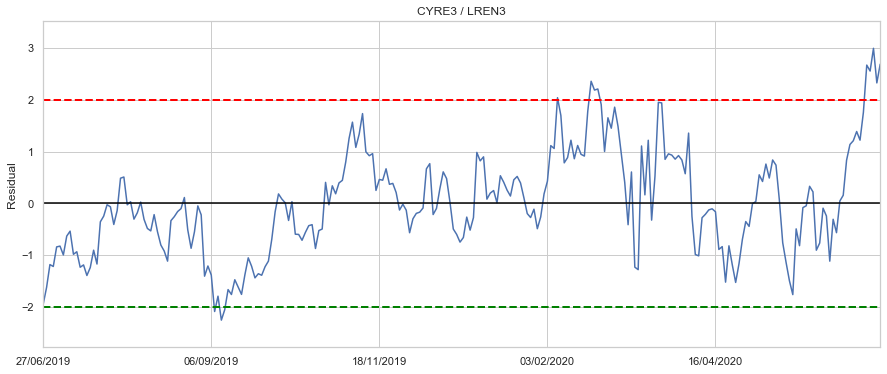

In [387]:
show(data, y_symbol, x_symbol, period)